# Week 2 - Dynamics Problem Set

In [15]:
import numpy as np
from scipy import linalg
import time
from matplotlib import pyplot as plt
from numba import jit
import numpy as np
from scipy import stats
from scipy.stats import beta
from scipy.stats import norm 
import quantecon as qe

Problem 1.1

In [16]:

with open('matrix_data.txt') as file:
    array2d = np.array([[float(digit) for digit in line.split()] for line in file])
lambdas = linalg.eig(array2d, b=None, left=False, right=False)
spect_rad = max(abs(lambdas))

imax = 100000
# function for calculating the spectral radius
def spectral_radius(i):
    prod = np.linalg.matrix_power(array2d,i)
    nu = np.ones(10)
    vect = prod @ nu
    normvector = linalg.norm(vect, ord = 2)
    converge = normvector**(1/i)
    difference = converge - spect_rad
    return difference
       
sequence = []
# Call the spectral radius function to check the difference and plot
for i in range(1,imax+1):
    sequence.append(spectral_radius(i))

print("Spectral Radius is: " + str(round(spect_rad,4)))
print ("The difference between inbuilt function and spectral method is:"  + str(sequence[-1]))
    

Spectral Radius is: 1.0044
The difference between inbuilt function and spectral method is:1.200420037306138e-05


Problem 1.2

time for computation is:  0.20990155288973256


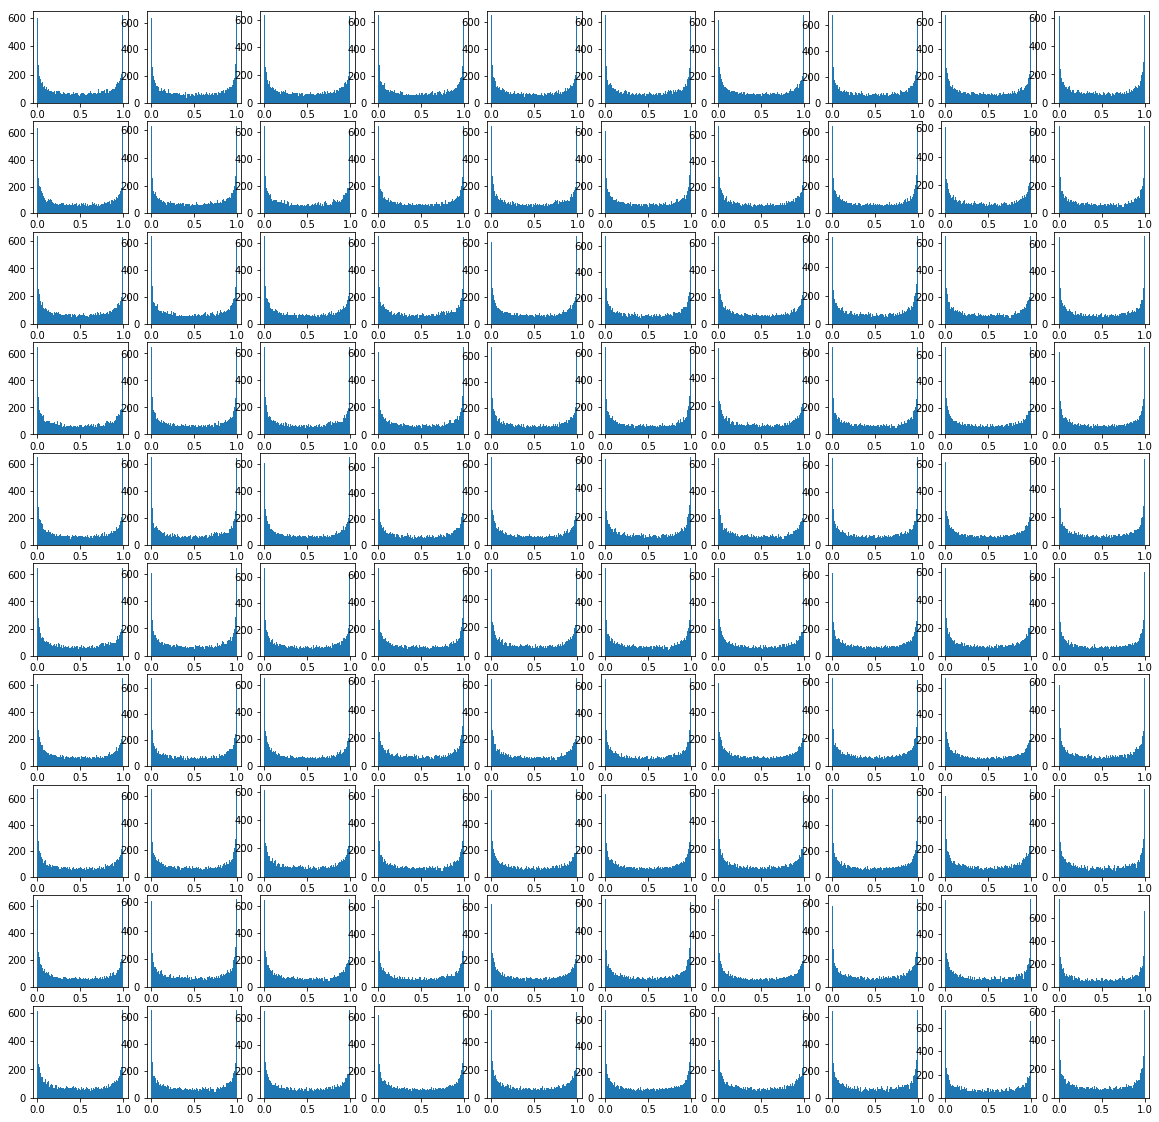

In [13]:
time_length=10000

@jit
def g(x):
    g = 4 * x * (1 - x)
    return g

@jit
def timeseries(x):
    A = np.array(x)
    A = np.append(A, g(x))
    iter = 1
    while iter < time_length:
        A = np.append(A, g(A[-1]))
        iter += 1
    return A

@jit
def initial_conditions():
    initial_conditions = np.empty(100)
    for i in range(100):
        initial_conditions[i] = np.random.uniform(0,1,1)
    return initial_conditions

@jit
def plotting():
    fig, ax = plt.subplots(10,10, figsize=(20,20))
    for i in range(10):
        for j in range(10):
            ax[i,j].hist(timeseries(init[i+j]), bins = 100)
    

time_start = time.clock()
init = initial_conditions()
time_elapsed = (time.clock()-time_start)
print('time for computation is: ', time_elapsed)
plotting()
# fig.savefig('plot.pdf')

Problem 1.3

 Following two results are provided to us- <br>

(i) $g$ is continuous at $\hat{x}$

(ii) $g^t(\hat{x}) \rightarrow \hat{x}$ as $x \rightarrow \infty$

Proof- <br>

Since $g(x)$ is continuous at $\hat{x}$, which means that there exists $\epsilon_1 > 0 $  such that 
$$\Rightarrow |g(x^\prime) - g(\hat{x})| < \epsilon_1$$ if $$|x^\prime - \hat{x}|<\delta_1 $$


Since it is given that $g^t(x) \rightarrow \hat{x}$,  there exist  $x^\prime, \epsilon, \delta_2 > 0$ such that:
$$|g(x^\prime) - \hat{x}| < \epsilon_2 $$ if $$|x^\prime - \hat{x}|<\delta_2$$


Choosing $\delta = \min(\delta_1, \delta_2)$, we have 
$$|g(x^\prime) - \hat{x}| < \epsilon_1 $$ and 
$$|g(x^\prime) - g(\hat{x})| < \epsilon_1$$ 
if $$|x^\prime - \hat{x}|<\delta$$

Therefore we have
$$|g(\hat{x}) - \hat{x}| = |g(\hat{x}) + g(x^\prime) - g(x^\prime) - \hat{x}|$$
$$ = |g(\hat{x}) - g(x^\prime) + g(x^\prime) - \hat{x}|$$
$$ \le |g(\hat{x}) - g(x^\prime)| + |g(x^\prime) - \hat{x}|$$ 
$$ < \epsilon_1 + \epsilon_2 = \epsilon$$

if $|\hat{x} - x^\prime|< \delta$ i.e $x^\prime \ne \hat{x}$

Which shows that the distance between $g(\hat{x})$ and $\hat{x}$ is arbitrarily small. Hence $g(\hat{x}) \rightarrow \hat{x}$ 



Problem 2.1

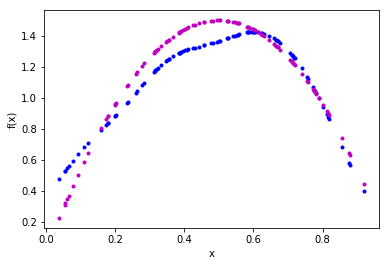

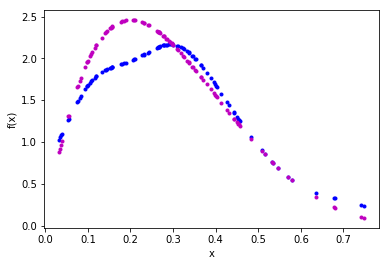

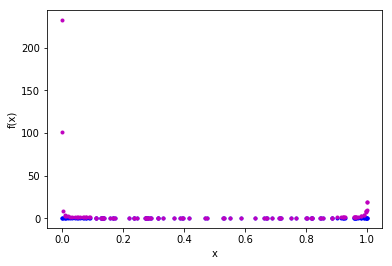

In [8]:
#Calculate the kernel density for beta function
def kdensity(a,b,n):
    x = np.random.beta(a,b,n)
    h = 1.06*((np.var(x))**0.5)*n**(-1/5) # Asper Silverman formula
    nh = 1/(n*h)
    B = nh*normalfunc(x,h)
    plt.plot(x,B,'b.')
    plt.plot(x,beta.pdf(x,a,b),'m.')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    return plt.show()

# Use normal distribution for pdf
def normalfunc(x,h):
    list =np.empty(len(x))
    for i in range(len(x)):
        pdfnormal=norm.pdf((x-x[i])/h,0,1)
        list = list + pdfnormal
    return list


kdensity(2,2,100)
kdensity(2,5,100)
kdensity(0.5,0.5,100)



Problem 2.2

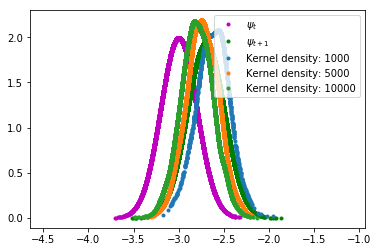

In [11]:
rho = 0.9
b = 0.0
sigma = 0.1
mu = -3.0
s = 0.2

# plot the distribution for  Psi_t

x= norm.rvs(mu,s, size=10000)
fx = norm.pdf(x,mu,s)
plt.plot(x,fx,'m.', label='$\psi_t$')
plt.axis('equal')
plt.legend()

# plot the distribution for  Psi_t+1
x1= norm.rvs(rho*mu+ b, (((rho*s)**2)+sigma**2)**0.5, size=10000)
fx1= norm.pdf(x1, rho*mu+ b, (((rho*s)**2)+sigma**2)**0.5)
plt.plot(x1,fx1,'g.', label='$\psi_{t+1}$')
plt.legend()
plt.xlim(-4,-2)


def draws(n,mu,s):
    x = s*np.random.randn(n)+mu
    return x

def update(n,mu,s):
    xt1=rho*draws(n,mu,s)+b+sigma*(np.random.randn(1))
    return xt1

# density function for 
def kdensity(x,n):
    h = 1.06*((np.var(x))**0.5)*n**(-1/5)
    nh = 1/(n*h)
    B = nh*normalfunc(x,h)
    plt.plot
    return x,B

def normalfunc(x,h):
    list =np.empty(len(x))
    for i in range(len(x)):
        pdfnormal=norm.pdf((x-x[i])/h,0,1)
        list = list + pdfnormal
    return list

for i,j in enumerate([1000,5000,10000]): 
    A = kdensity(update(j,mu,s),j)
    plt.plot(A[0], A[1], '.', label=""'Kernel density: '+str(j))
    plt.axis('equal')
    plt.legend()
plt.show()
   


Problem 2.3

Gelfand formula is given by:
$$ r(A) = ||A^{k}||^\frac{1}{k} $$
<br>

By Sub multiplicative property , we have 
$$\Rightarrow ||A^k||\le ||A||^k$$
We can further write, for k > 1
<br>
$$\Rightarrow ||A^{k}||^\frac{1}{k} \le ||A||^\frac{k}{k} $$
<br>
$$\Rightarrow r(A)\le ||A|| $$
<br>
We can raise both sides  which are scalars to power k and preserve inequality for k>1 
<br>

$$ \Rightarrow r(A)^k\le ||A||^k $$
<br>

We are given that r(A) is less than one, therefore  for the LHS of above equation will  $\lim_{k\rightarrow\infty}r(A)^k=0$

$$ 0\le ||A||^k$$
Since Norm is non- negative, this inequality will be satisfied with equality at k = $\infty $. Hence
$$\lim_{k\rightarrow\infty}||A||^k = 0$$

Problem 3.1 to 3.3

Text(0.3,0.3,'Ergodic n: 1000, Ergodic T: 10000 ')

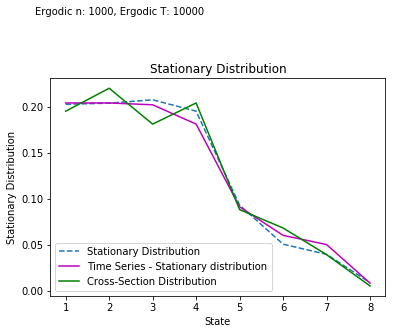

In [16]:
P = [[0.222, 0.222, 0.215, 0.187, 0.081, 0.038, 0.029, 0.006],
     [0.221, 0.220, 0.215, 0.188, 0.082, 0.039, 0.029, 0.006],
     [0.207, 0.209, 0.210, 0.194, 0.090, 0.046, 0.036, 0.008],
     [0.198, 0.201, 0.207, 0.198, 0.095, 0.052, 0.040, 0.009],
     [0.175, 0.178, 0.197, 0.207, 0.110, 0.067, 0.054, 0.012],
     [0.182, 0.184, 0.200, 0.205, 0.106, 0.062, 0.050, 0.011],
     [0.123, 0.125, 0.166, 0.216, 0.141, 0.114, 0.094, 0.021],
     [0.084, 0.084, 0.142, 0.228, 0.170, 0.143, 0.121, 0.028]]

mc=qe.MarkovChain(P)
A=mc.stationary_distributions

states=np.arange(1,9)
plt.plot(states, A.T,'--', label="Stationary Distribution")
plt.xlabel('State')
plt.ylabel('Stationary Distribution')
plt.title('Stationary Distribution')
plt.legend()

A = mc.simulate(1000)
B=np.zeros(8)
for i in range(8):
    B[i]=np.mean(A==i)
states=np.arange(1,9)
plt.plot(states, B, 'm', label="Time Series - Stationary distribution") 
plt.legend()

def ergodicity(n,T):
    mc=qe.MarkovChain(P)
    A=[None]*n
    for i in range(n):
        path=mc.simulate(T)
        A[i]=path
    return A

def dist_ergodic(x,T):
    B=np.empty(len(x))
    for i in range(len(x)):
        B[i]=x[i][T-1]
    return B
        
states=np.linspace(1,8,8)   
Q=ergodicity(1000,10000)
R=dist_ergodic(Q,10000)

S=np.zeros(8)
for i in range(8):
    S[i]=np.mean(R==i)
plt.plot(states, S, 'g', label="Cross-Section Distribution") 
plt.legend()
plt.text(0.3,0.3,'Ergodic n: 1000, Ergodic T: 10000 ')